In [48]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [49]:
#reading the dataset
data = pd.read_csv("googleplaystore_user_reviews.csv")

In [50]:
#printing first 5 columns
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [51]:
data.shape

(64295, 5)

In [52]:
#checking null values
data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [53]:
# Drop columns with more than 50% missing values
# threshold = 0.5 * len(df)
# data = data.dropna(axis=1, thresh=threshold)

In [54]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [55]:
# Drop duplicate rows
data = data.drop_duplicates()

In [56]:
# Drop rows with missing sentiment labels
data = data.dropna(subset=["Sentiment"])

In [57]:
# Fill missing translated reviews with empty string
data["Translated_Review"].fillna("", inplace=True)

In [58]:
# Convert reviews to lowercase
data["Translated_Review"] = data["Translated_Review"].str.lower()

In [59]:
# Remove special characters and numbers
import re
data["Translated_Review"] = data["Translated_Review"].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [60]:
# Remove stopwords
data["Translated_Review"] = data["Translated_Review"].apply(
    lambda x: ' '.join([word for word in x.split() if word not in data["Translated_Review"]]))

In [61]:
data.shape

(29697, 5)

In [62]:
data.isnull().sum() 
#no null values

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [63]:
data["Translated_Review"].value_counts()

Translated_Review
good                                                                                                                      191
nice                                                                                                                      131
great                                                                                                                     107
love                                                                                                                       93
very good                                                                                                                  69
                                                                                                                         ... 
much better calculator came nexus tablet                                                                                    1
easy uselove ability review items addedsubtracted like adding machine tape                          

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data["Sentiment"].value_counts()

Sentiment
Positive    19015
Negative     6321
Neutral      4361
Name: count, dtype: int64

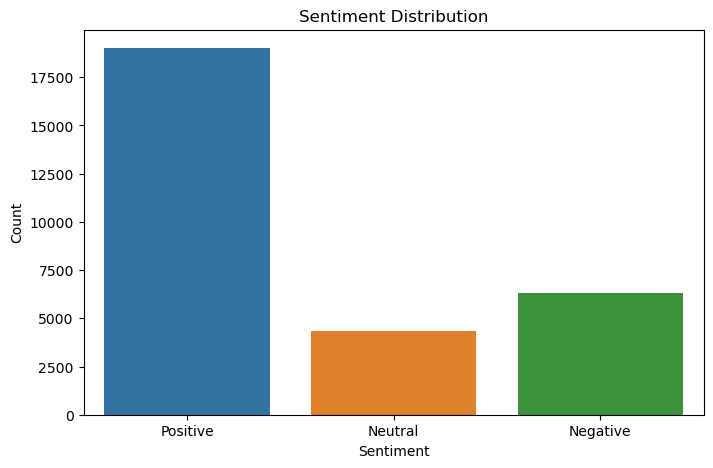

In [66]:
# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Sentiment", data=data,hue="Sentiment")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

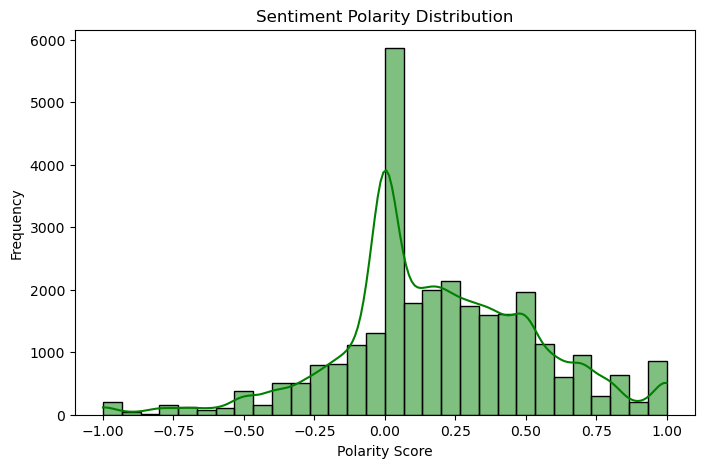

In [67]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Sentiment_Polarity"], bins=30, kde=True, color="green")
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

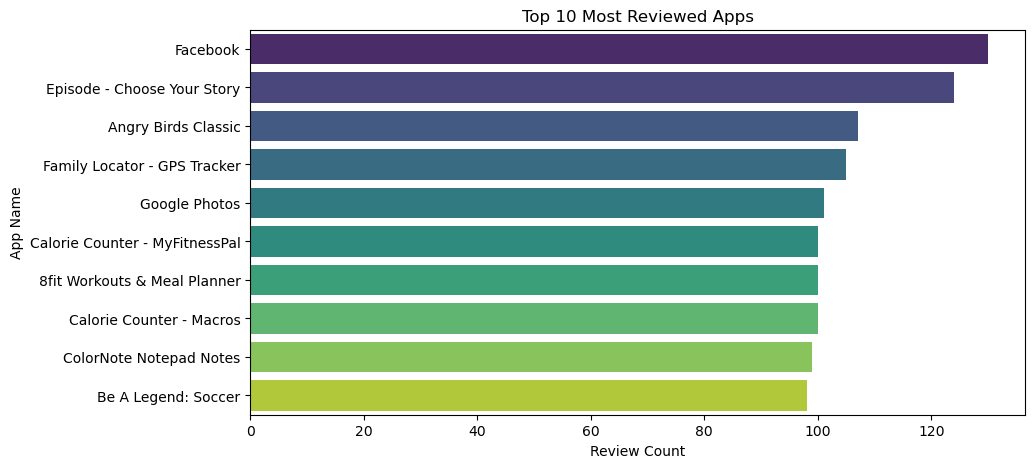

In [68]:
# Top 10 Apps by Review Count
top_apps = data["App"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_apps.values, y=top_apps.index, palette="viridis")
plt.title("Top 10 Most Reviewed Apps")
plt.xlabel("Review Count")
plt.ylabel("App Name")
plt.show()

In [69]:
# Encode Sentiments (Positive: 2, Neutral: 1, Negative: 0)
data['Sentiment'] = data['Sentiment'].map({'Positive': 2, 'Neutral': 1, 'Negative': 0})

In [70]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Translated_Review'])
y = data['Sentiment']

In [71]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
#training model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [73]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Predictions
y_pred = model.predict(X_test)

In [75]:
cfm= confusion_matrix(y_test,y_pred)
print(cfm)
print("Classification Report:")
print(classification_report(y_test,y_pred))
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Model:",acc)

[[ 756   84  467]
 [  10  704  126]
 [  61   76 3656]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      1307
           1       0.81      0.84      0.83       840
           2       0.86      0.96      0.91      3793

    accuracy                           0.86      5940
   macro avg       0.86      0.79      0.81      5940
weighted avg       0.87      0.86      0.85      5940

Accuracy of Model: 0.8612794612794613


In [76]:
#Performing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [77]:
model1 = LogisticRegression()

In [78]:
model1.fit(X_train,y_train)

LogisticRegression()

In [79]:
y_pred = model1.predict(X_test)
print(list(zip(y_test,y_pred)))

[(0, 2), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (0, 0), (0, 2), (1, 1), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (1, 1), (0, 0), (2, 2), (2, 2), (0, 0), (1, 0), (2, 2), (1, 0), (2, 2), (2, 2), (2, 2), (1, 1), (1, 1), (2, 2), (0, 0), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (0, 0), (0, 0), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (0, 0), (0, 2), (0, 0), (2, 2), (1, 1), (1, 1), (2, 2), (0, 1), (2, 2), (0, 2), (1, 1), (0, 0), (2, 0), (0, 0), (0, 0), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (2, 0), (2, 2), (2, 2), (2, 2), (0, 1), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (0, 0), (0, 0),

In [80]:
cfm= confusion_matrix(y_test,y_pred)
print(cfm)
print("Classification Report:")
print(classification_report(y_test,y_pred))
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Model:",acc)

[[ 975   73  259]
 [  23  707  110]
 [  92   55 3646]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1307
           1       0.85      0.84      0.84       840
           2       0.91      0.96      0.93      3793

    accuracy                           0.90      5940
   macro avg       0.88      0.85      0.86      5940
weighted avg       0.90      0.90      0.89      5940

Accuracy of Model: 0.896969696969697


In [81]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
X,Y = sampler.fit_resample(X,y)

In [82]:
model1 = LogisticRegression(random_state=42)
model1.fit(X,Y)

LogisticRegression(random_state=42)

In [83]:
y_pred = model1.predict(X_test)
print(list(zip(y_test,y_pred)))

[(0, 0), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (0, 0), (0, 0), (1, 1), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (1, 1), (0, 0), (2, 2), (2, 2), (0, 0), (1, 1), (2, 2), (1, 0), (2, 2), (2, 2), (2, 2), (1, 1), (1, 1), (2, 2), (0, 0), (0, 0), (2, 2), (2, 2), (2, 2), (2, 1), (2, 2), (2, 1), (0, 0), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (1, 1), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 0), (2, 0), (0, 0), (0, 0), (1, 1), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (0, 0), (0, 2), (0, 0), (2, 0), (1, 1), (1, 1), (2, 2), (0, 0), (2, 0), (0, 2), (1, 1), (0, 1), (2, 0), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (2, 0), (2, 2), (2, 2), (2, 2), (0, 1), (2, 0), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (0, 0), (0, 0),

In [84]:
cfm = confusion_matrix(y_test,y_pred)
print(cfm)
print("Classification Report:")
print(classification_report(y_test,y_pred))
acc = accuracy_score(y_test,y_pred)
print("Accuracy of Model:",acc)

[[1168   96   43]
 [  12  822    6]
 [ 284  316 3193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1307
           1       0.67      0.98      0.79       840
           2       0.98      0.84      0.91      3793

    accuracy                           0.87      5940
   macro avg       0.82      0.90      0.85      5940
weighted avg       0.90      0.87      0.88      5940

Accuracy of Model: 0.8725589225589225


In [85]:
#Finetuning the model by Using kfold Cross Validation
# model1 = LogisticRegression()

# #performing kfold_cross_validation
# from sklearn.model_selection import KFold
# kfold_cv=KFold(n_splits=10,shuffle=True)
# # print(kfold_cv)


# from sklearn.model_selection import cross_val_score
# #running model using scoring metric as accuracy
# kfold_cv_result=cross_val_score(estimator=model1,X=X_train,y=y_train,cv=kfold_cv)

# print(kfold_cv_result)
# #finding mean
# print(kfold_cv_result.mean())

In [86]:
import pickle

In [87]:
with open("model1.pkl","wb")as file:
    pickle.dump(model1,file)

In [88]:
with open("vectorizer.pkl","wb") as file1:
    pickle.dump(vectorizer,file1)

In [89]:
# #Predictions
# y_pred = model1.predict(X_test)


In [90]:
# Save preprocessed data to a new CSV file
data.to_csv("preprocessed_reviews.csv", index=False)
print("Preprocessing and Random Forest model training completed! Cleaned data saved.")

Preprocessing and Random Forest model training completed! Cleaned data saved.


In [91]:
# Function for predicting sentiment
def predict_sentiment(review):
    review = review.lower()
    review = re.sub(r'[^a-z\s]', '', review)
    review = ' '.join([word for word in review.split() if word not in data["Translated_Review"]])
    review_vectorized = vectorizer.transform([review])
    prediction = model1.predict(review_vectorized)[0]
    sentiment_map = {2: 'Positive', 1: 'Neutral', 0: 'Negative'}
    return sentiment_map[prediction]

In [92]:
example_review = "always challenging definetly worth it i feel energetic loose day made better power too it puts little ease tells almost gives good advice!"
print(f"Predicted Sentiment: {predict_sentiment(example_review)}")

Predicted Sentiment: Positive


In [142]:
example_review = "this keep dropping i open n loses signal takes long load friends receiving photos im sending them"
print(f"Predicted Sentiment: {predict_sentiment(example_review)}")

Predicted Sentiment: Negative


In [94]:
example_review = "fix problem the error occurred im happy give five stars!"
print(f"Predicted Sentiment: {predict_sentiment(example_review)}")


Predicted Sentiment: Neutral
